<a href="https://colab.research.google.com/github/SantiagoMorenoV/Combined-Cycle-Power-Plant/blob/main/Models/Combined_Cycle_Power_Plant_Polynomial_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Combined Cycle Power Plant - Polynomial Regression**

The "Combined Cycle Power Plant" dataset contains the following features (variables):

* **Temperature (T):** The temperature measured in °C.

* **Ambient Pressure (AP):** The ambient pressure measured in millibars.

* **Relative Humidity (RH):** The relative humidity measured in percent.

* **Exhaust Vacuum (V):** The exhaust vacuum measured in cm Hg.

* **Electrical Energy Output (EP):** The electrical energy output of the power plant measured in MW.

These features are used to estimate the electrical energy output of a combined cycle power plant. Each instance in the dataset represents a specific combination of these features and the corresponding electrical energy output.

For this purpose, I will estimate a *polynomial regression* model and obtain its determination coefficient.

##Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##Importing the dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/SantiagoMorenoV/Combined-Cycle-Power-Plant/main/Data.csv')
X = dataset.iloc[:, :-1].values
y=  dataset.iloc[:, -1].values
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


#**Descriptive Statistics**

In [ ]:
print("\n\033[1m\033[36m\033[6m{:^50}\033[0m".format("Descriptive Statistics"))
print(dataset.describe())


              Descriptive Statistics              
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


##**Distributions and Boxplots**

## **Histograms**

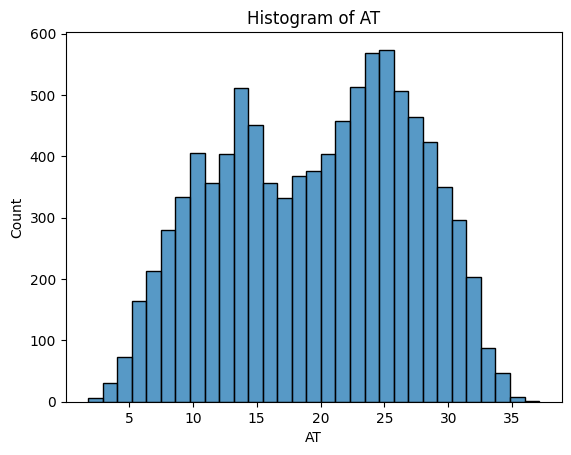

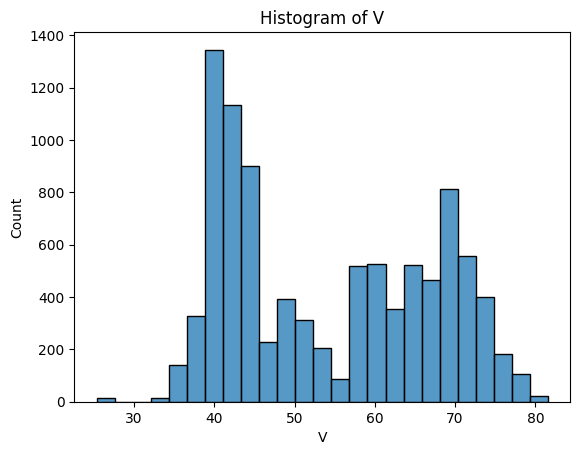

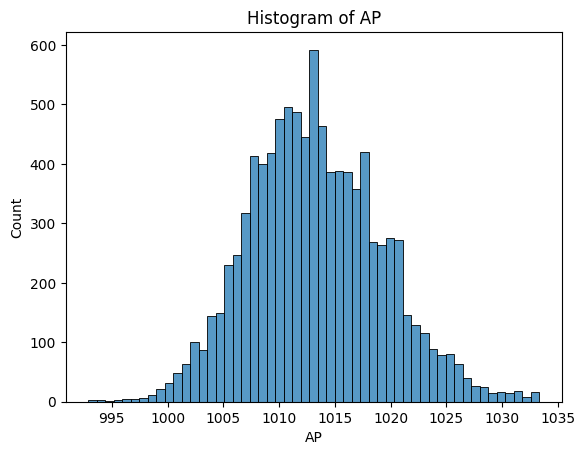

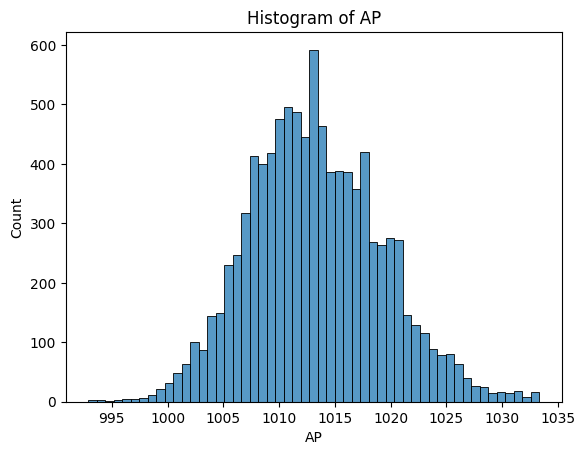

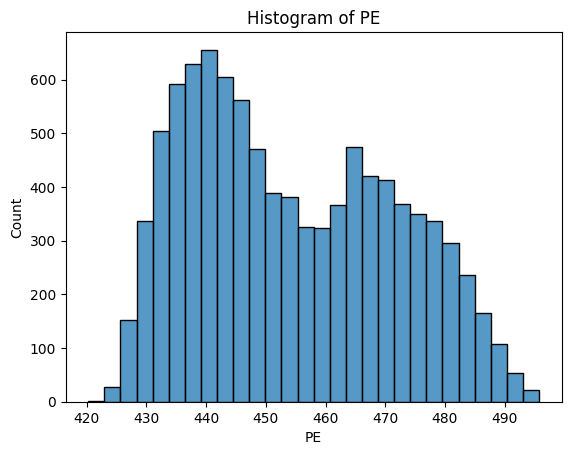

In [ ]:
# Selecting our variables
variables = ["AT", "V", "AP", "AP", "PE"]

# Creating histograms
for var in variables:
  sns.histplot(data = dataset, x = var)
  plt.title("Histogram of {}".format(var))
  plt.show()

##**Boxplots**

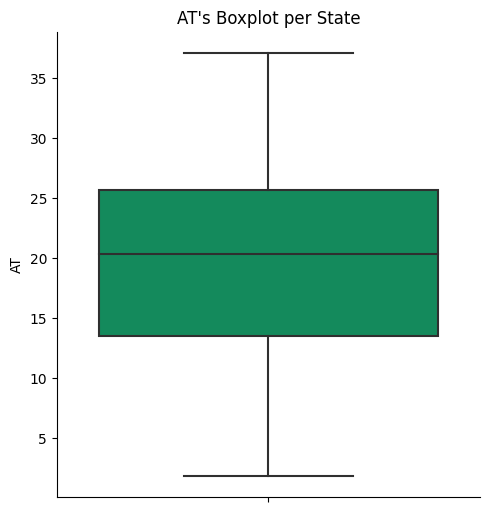

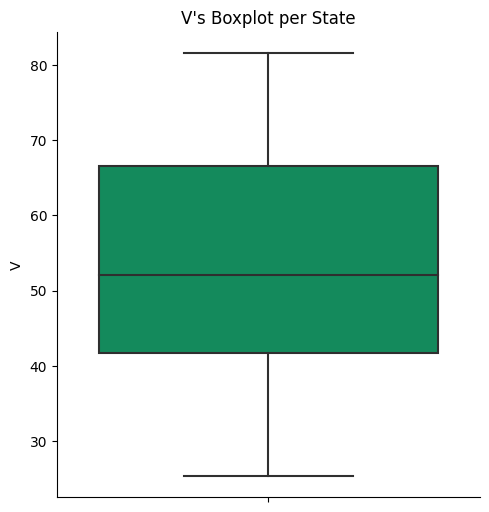

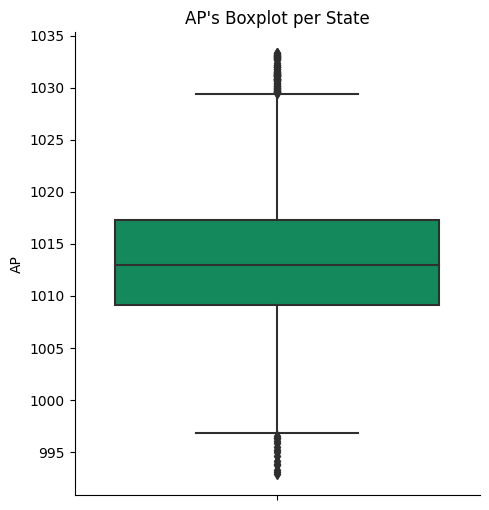

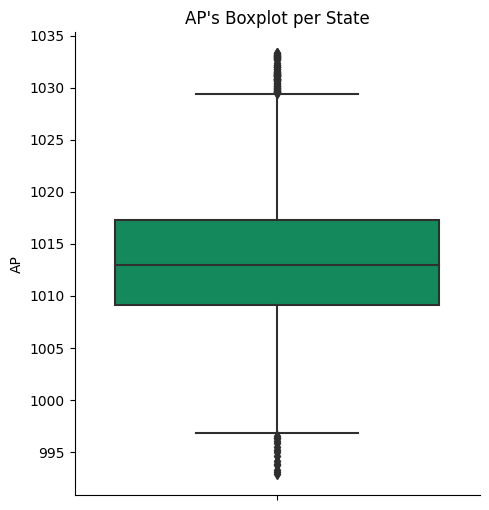

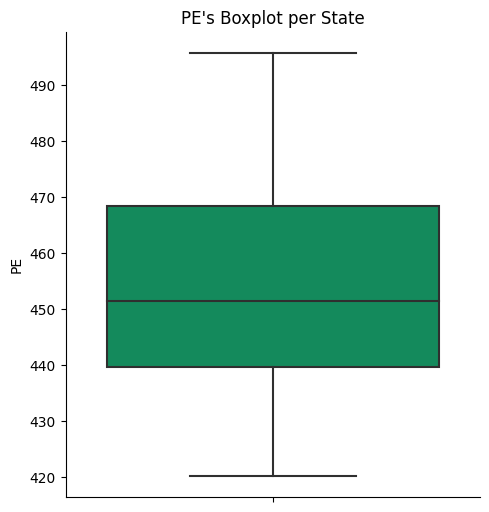

In [ ]:
# Creting Boxplots
for var in variables:
  sns.catplot(data=dataset, y = var, kind = "box", color = "#009E60")
  plt.title("{}'s Boxplot per State".format(var))
  plt.show()

##**Violin Plots**

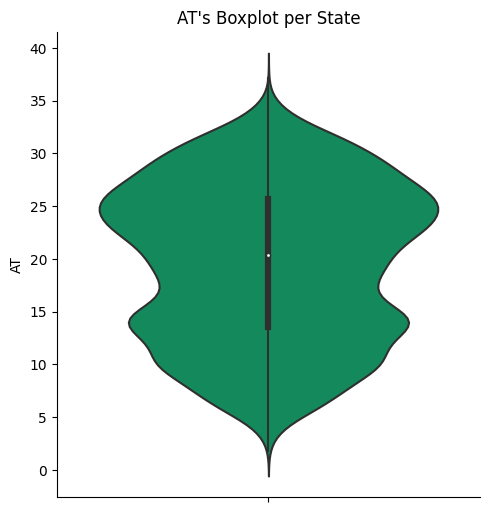

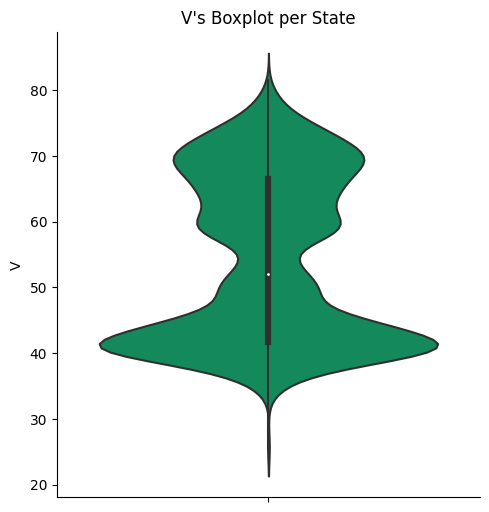

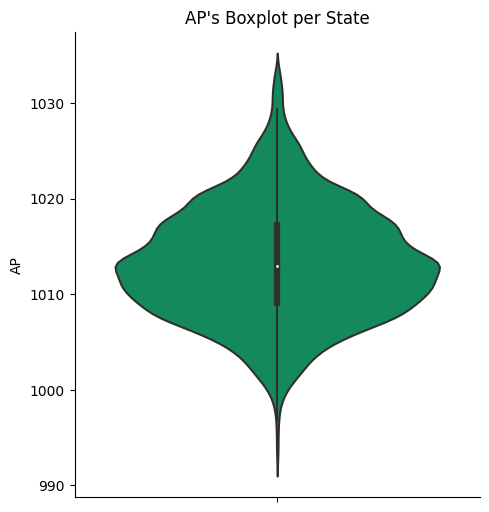

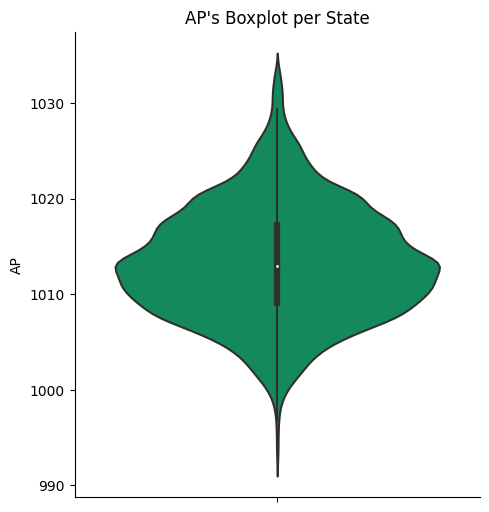

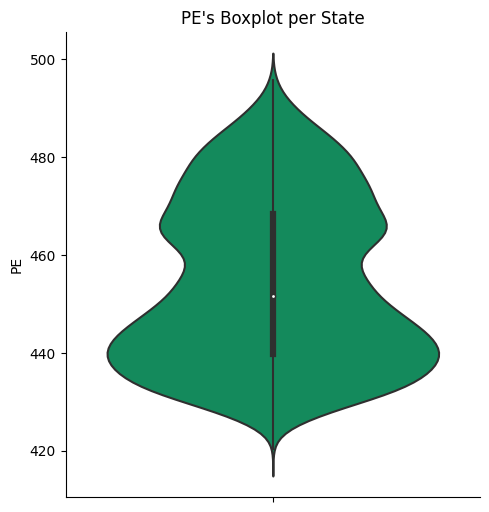

In [ ]:
# Creting Boxplots
for var in variables:
  sns.catplot(data=dataset, y = var, kind = "violin", color = "#009E60")
  plt.title("{}'s Boxplot per State".format(var))
  plt.show()

#**Splitting the dataset into the Training and Test sets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

# **Training the Polynomial Regression model on the Training set**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

#**Predicting the Test set results**

In [ ]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.66 463.28]]


# **Evaluating the Model Performance**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9458192809530098